In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import seaborn as sns


In [2]:
marks = pd.read_csv("Student_Marks.csv")
marks.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [3]:
marks.info()
marks.describe()
marks.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


number_courses    0
time_study        0
Marks             0
dtype: int64

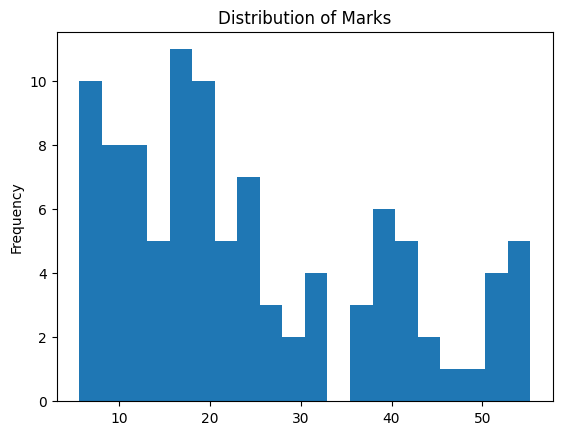

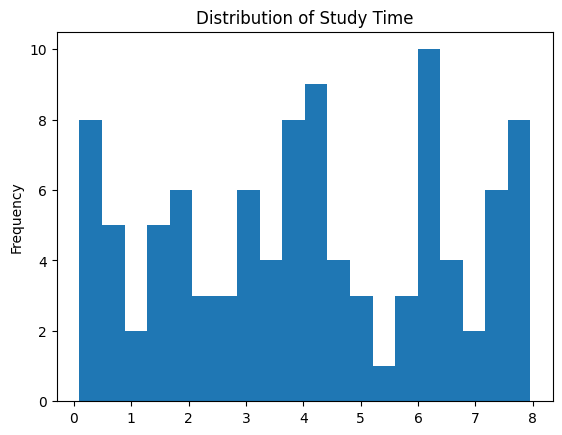

In [4]:
marks['Marks'].plot(kind='hist', bins=20, title='Distribution of Marks')
plt.show()

marks['time_study'].plot(kind='hist', bins=20, title='Distribution of Study Time')
plt.show()


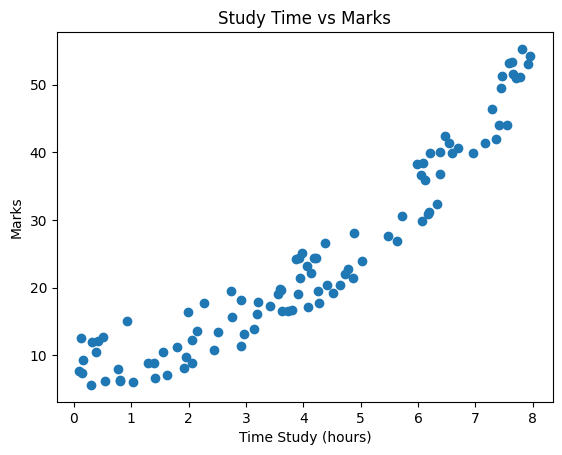

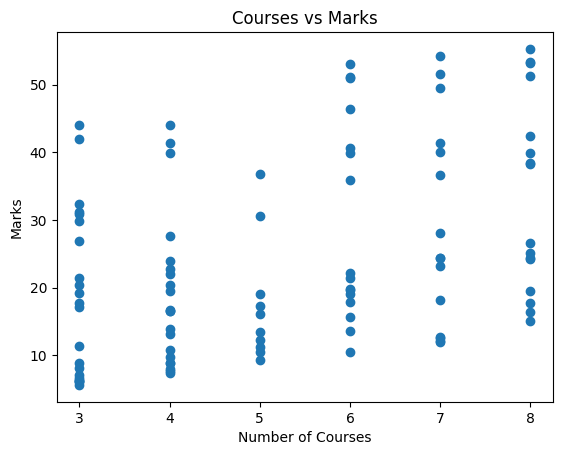

In [5]:
plt.scatter(marks['time_study'], marks['Marks'])
plt.xlabel("Time Study (hours)")
plt.ylabel("Marks")
plt.title("Study Time vs Marks")
plt.show()

plt.scatter(marks['number_courses'], marks['Marks'])
plt.xlabel("Number of Courses")
plt.ylabel("Marks")
plt.title("Courses vs Marks")
plt.show()


In [6]:
marks.corr()


,number_courses,time_study,Marks
number_courses,1.000000,0.204844,0.417335
time_study,0.204844,1.000000,0.942254
Marks,0.417335,0.942254,1.000000


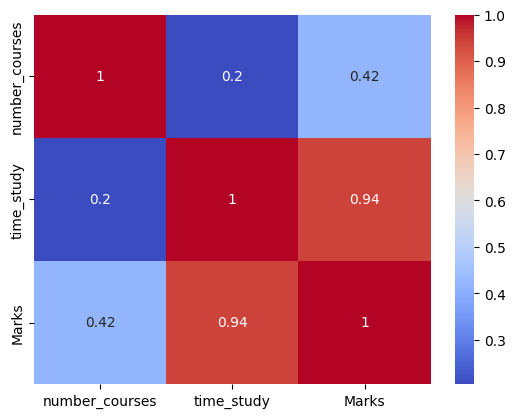

In [11]:
sns.heatmap(marks.corr(), annot=True, cmap="coolwarm")
plt.show()

In [13]:
X = marks[['number_courses', 'time_study']]
y = marks['Marks']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

model = LinearRegression()
model.fit(X_train,y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
y_pred = model.predict(X_test)

MAE = mean_absolute_error(y_test, y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
R2 = r2_score(y_test, y_pred)

print("MAE: ", MAE)
print("RMSE: ", RMSE)
print("R2: ", R2)

MAE:  3.0793452296666843
RMSE:  3.768385083344663
R2:  0.9459936100591213


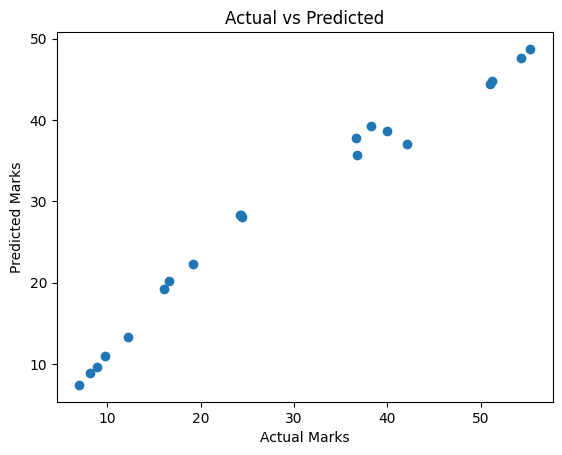

In [15]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Marks")
plt.ylabel("Predicted Marks")
plt.title("Actual vs Predicted")
plt.show()


In [16]:
new_students = pd.DataFrame(
    [[2, 5.321],
     [6, 20.534],
     [4, 7.432],
     [9, 5.0],
     [5, 9.5]],
    columns=['number_courses', 'time_study']
)

new_predictions = model.predict(new_students)
new_predictions


array([ 24.6389407 , 110.77439939,  39.29563976,  36.08026105,
        51.85848445])